In [1]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from scipy import stats
import sys

In [14]:
matrixMalEX="data_GG.csv"
matrixMal="data_GM.csv"
matrixIt="data_L.csv"
n_qty=2 #CAMBIAR SEGUN LA CANTIDAD DE NODOS USADOS
n_groups= 2
repet = 3 #CAMBIAR EL PRIMER NUMERO SEGUN NUMERO DE EJECUCIONES POR CONFIG

p_value = 0.05
values = [2, 10, 20, 40]
#                      WORST          BEST
dist_names = ['null', 'BalancedFit', 'CompactFit']

labelsP = [['(2,2)', '(2,10)', '(2,20)', '(2,40)'],['(10,2)', '(10,10)', '(10,20)', '(10,40)'],
          ['(20,2)', '(20,10)', '(20,20)', '(20,40)'],['(40,2)', '(40,10)', '(40,20)', '(40,40)']]
labelsP_J = ['(2,2)', '(2,10)', '(2,20)', '(2,40)','(10,2)', '(10,10)', '(10,20)', '(10,40)',
              '(20,2)', '(20,10)', '(20,20)', '(20,40)','(40,2)', '(40,10)', '(40,20)', '(40,40)']
positions = [321, 322, 323, 324, 325]
positions_small = [221, 222, 223, 224]

In [15]:
dfG = pd.read_csv( matrixMalEX )

dfG = dfG.drop(columns=dfG.columns[0])
dfG['S'] = dfG['N']
dfG['N'] = dfG['S'] + dfG['%Async']
dfG['%Async'] = (dfG['%Async'] / dfG['N']) * 100
dfG['%Async'] = dfG['%Async'].fillna(0)

if(n_qty == 1):
    group = dfG.groupby(['%Async', 'Groups'])['TE']
else:        
    group = dfG.groupby(['Dist', '%Async', 'Groups'])['TE']

#group
grouped_aggG = group.agg(['mean'])
grouped_aggG.rename(columns={'mean':'TE',}, inplace=True)

In [20]:
dfM = pd.read_csv( matrixMal )
dfM = dfM.drop(columns=dfM.columns[0])

dfM['S'] = dfM['N']
dfM['N'] = dfM['S'] + dfM['%Async']
dfM["TR"] = dfM["TC"] + dfM["TH"] + dfM["TS"] + dfM["TA"]
dfM['%Async'] = (dfM['%Async'] / dfM['N']) * 100

dfM['%Async'] = dfM['%Async'].fillna(0)


if(n_qty == 1):
    groupM = dfM.groupby(['%Async','NP', 'NS'])['TC', 'TH', 'TS', 'TA', 'TR']
else:
    groupM = dfM.groupby(['Dist', '%Async','NP', 'NS'])['TC', 'TH', 'TS', 'TA', 'TR']

#group
grouped_aggM = groupM.agg(['mean'])
grouped_aggM.columns = grouped_aggM.columns.get_level_values(0)

In [17]:
dfL = pd.read_csv( matrixIt )
dfL = dfL.drop(columns=dfL.columns[0])

dfL['%Async'] = dfL['%Async'].fillna(0)

if(n_qty == 1):
    groupL = dfL[dfL['NS'] != 0].groupby(['Tt', '%Async', 'NP', 'NS'])['Ti', 'To']
else:
    groupL = dfL[dfL['NS'] != 0].groupby(['Tt', 'Dist', '%Async', 'NP', 'NS'])['Ti', 'To']

#group
grouped_aggL = groupL.agg(['mean', 'count'])
grouped_aggL.columns = grouped_aggL.columns.get_level_values(0)
grouped_aggL.set_axis(['Ti', 'Iters', 'To', 'Iters2'], axis='columns')

grouped_aggL['Iters'] = np.round(grouped_aggL['Iters']/repet)
grouped_aggL['Iters2'] = np.round(grouped_aggL['Iters2']/repet)

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  


In [67]:
grouped_aggL.to_excel("resultL.xlsx") 
grouped_aggM.to_excel("resultM.xlsx") 
grouped_aggG.to_excel("resultG.xlsx") 

In [6]:
dfG

N  %Async Groups Dist  Matrix  CommTam  Time Iters        TE  S
0   0     0.0  20,10  1,1  100000        0   0.4  1,10  0.387869  0
1   0     0.0  20,10  1,1  100000        0   0.4  1,10  0.423120  0
2   0     0.0  20,10  1,1  100000        0   0.4  1,10  0.472982  0
3   0     0.0  40,10  1,1  100000        0   0.4  1,10  1.144715  0
4   0     0.0  40,10  1,1  100000        0   0.4  1,10  1.152502  0
.. ..     ...    ...  ...     ...      ...   ...   ...       ... ..
91  0     0.0   2,10  1,1  100000        0   0.4  1,10  0.953515  0
92  0     0.0   2,10  1,1  100000        0   0.4  1,10  0.952264  0
93  0     0.0   40,2  1,1  100000        0   0.4  1,10  0.561208  0
94  0     0.0   40,2  1,1  100000        0   0.4  1,10  0.498228  0
95  0     0.0   40,2  1,1  100000        0   0.4  1,10  0.564727  0

[96 rows x 10 columns]

In [7]:
grouped_aggG

TE
Dist %Async Groups          
1,1  0.0    10,10   0.508879
            10,2    0.995088
            10,20   0.669420
            10,40   1.458222
            2,10    0.951549
            2,2     2.219202
            2,20    0.909392
            2,40    1.355253
            20,10   0.427990
            20,2    0.421782
            20,20   0.763020
            20,40   1.546889
            40,10   1.101985
            40,2    0.541388
            40,20   1.294718
            40,40   1.755568
2,2  0.0    10,10   0.745033
            10,2    0.662288
            10,20   1.523874
            10,40   1.443683
            2,10    1.109833
            2,2     2.217484
            2,20    1.599292
            2,40    1.529876
            20,10   1.279719
            20,2    0.897674
            20,20   1.671315
            20,40   1.728683
            40,10   1.308367
            40,2    0.771345
            40,20   1.640378
            40,40   1.744211

In [21]:
dfM

N  %Async  NP  NS Dist  Matrix  CommTam  Time Iters        TC        TH  \
0   0     0.0  20  10  1,1  100000        0   0.4  1,10  0.367837  0.000067   
1   0     0.0  20  10  1,1  100000        0   0.4  1,10  0.403131  0.000061   
2   0     0.0  20  10  1,1  100000        0   0.4  1,10  0.452980  0.000059   
3   0     0.0  40  10  1,1  100000        0   0.4  1,10  1.099791  0.000076   
4   0     0.0  40  10  1,1  100000        0   0.4  1,10  1.125973  0.000063   
.. ..     ...  ..  ..  ...     ...      ...   ...   ...       ...       ...   
91  0     0.0   2  10  1,1  100000        0   0.4  1,10  0.423576  0.000046   
92  0     0.0   2  10  1,1  100000        0   0.4  1,10  0.423226  0.000075   
93  0     0.0  40   2  1,1  100000        0   0.4  1,10  0.549139  0.000062   
94  0     0.0  40   2  1,1  100000        0   0.4  1,10  0.488046  0.000063   
95  0     0.0  40   2  1,1  100000        0   0.4  1,10  0.542324  0.000068   

     TS   TA  S        TR  
0   0.0  0.0  0  0.367904  
1   0.0  0.0  0  0.403192  
2   0.0  0.0  0  0.453039  
3   0.0  0.0  0  1.099867  
4   0.0  0.0  0  1.126036  
..  ...  ... ..       ...  
91  0.0  0.0  0  0.423622  
92  0.0  0.0  0  0.423301  
93  0.0  0.0  0  0.549201  
94  0.0  0.0  0  0.488109  
95  0.0  0.0  0  0.542392  

[96 rows x 15 columns]

In [22]:
grouped_aggM

TC        TH   TS   TA        TR
Dist %Async NP NS                                        
1,1  0.0    2  2   0.354418  0.000053  0.0  0.0  0.354472
               10  0.421456  0.000058  0.0  0.0  0.421514
               20  0.549015  0.000050  0.0  0.0  0.549065
               40  1.095739  0.000045  0.0  0.0  1.095784
            10 2   0.356249  0.000062  0.0  0.0  0.356311
               10  0.438358  0.000052  0.0  0.0  0.438410
               20  0.629802  0.000051  0.0  0.0  0.629853
               40  1.395133  0.000058  0.0  0.0  1.395191
            20 2   0.401695  0.000059  0.0  0.0  0.401754
               10  0.407983  0.000062  0.0  0.0  0.408045
               20  0.742614  0.000058  0.0  0.0  0.742671
               40  1.474785  0.000065  0.0  0.0  1.474850
            40 2   0.526503  0.000064  0.0  0.0  0.526567
               10  1.066937  0.000066  0.0  0.0  1.067003
               20  1.262803  0.000063  0.0  0.0  1.262866
               40  1.707607  0.000065  0.0  0.0  1.707672
2,2  0.0    2  2   0.421873  0.000057  0.0  0.0  0.421931
               10  0.619649  0.000064  0.0  0.0  0.619712
               20  1.308732  0.000055  0.0  0.0  1.308786
               40  1.268303  0.000051  0.0  0.0  1.268354
            10 2   0.413054  0.000062  0.0  0.0  0.413116
               10  0.705488  0.000056  0.0  0.0  0.705544
               20  1.457638  0.000053  0.0  0.0  1.457691
               40  1.369427  0.000080  0.0  0.0  1.369507
            20 2   0.876231  0.000080  0.0  0.0  0.876311
               10  1.243403  0.000073  0.0  0.0  1.243476
               20  1.614983  0.000070  0.0  0.0  1.615053
               40  1.666040  0.000087  0.0  0.0  1.666127
            40 2   0.755518  0.000064  0.0  0.0  0.755582
               10  1.236325  0.000075  0.0  0.0  1.236400
               20  1.575315  0.000062  0.0  0.0  1.575377
               40  1.682241  0.000072  0.0  0.0  1.682313

In [10]:
dfL

N  %Async  NP  N_par  NS  Dist  Compute_tam  Comm_tam  Time  Iters  \
0     0     0.0  20      0  10     1       100000         0   0.4      1   
1     0     0.0  20      0  10     1       100000         0   0.4      1   
2     0     0.0  20      0  10     1       100000         0   0.4      1   
3     0     0.0  20      0  10     1       100000         0   0.4      1   
4     0     0.0  20      0  10     1       100000         0   0.4      1   
...  ..     ...  ..    ...  ..   ...          ...       ...   ...    ...   
1812  0     0.0  40      0   2     1       100000         0   0.4      1   
1813  0     0.0  40      0   2     1       100000         0   0.4      1   
1814  0     0.0  40      0   2     1       100000         0   0.4      1   
1815  0     0.0  40      0   2     1       100000         0   0.4      1   
1816  0     0.0  40      0   2     1       100000         0   0.4      1   

            Ti   Tt    To  
0     0.019619  0.0  22.0  
1     0.019645  1.0  22.0  
2     0.019623  1.0  22.0  
3     0.019624  1.0  22.0  
4     0.019644  1.0  22.0  
...        ...  ...   ...  
1812  0.009814  1.0  11.0  
1813  0.009810  1.0  11.0  
1814  0.009828  1.0  11.0  
1815  0.009808  1.0  11.0  
1816  0.009819  1.0  11.0  

[1817 rows x 13 columns]

In [11]:
grouped_aggL

Ti  Iters     To  Iters2
Tt  Dist %Async NP NS                                
0.0 1    0.0    2  2   0.199694    1.0  224.0     1.0
                   10  0.199705    1.0  224.0     1.0
                   20  0.199701    1.0  224.0     1.0
                   40  0.199761    1.0  224.0     1.0
                10 2   0.039242    1.0   44.0     1.0
...                         ...    ...    ...     ...
1.0 2    0.0    20 40  0.031814   22.0   22.0    22.0
                40 2   0.010084   23.0   11.0    23.0
                   10  0.010247   30.0   11.0    30.0
                   20  0.010257   34.0   11.0    34.0
                   40  0.011543   35.0   11.0    35.0

[64 rows x 4 columns]

In [263]:
print("TIEMPO EJECUCCION")
sinc = 0
asinc = 0
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                group = str(numP) + "," + str(numC)
                v1 = dfG[(dfG["%Async"] == 0.0)][(dfG.Groups == group)][(dfG["Dist"] == dist_v)]['TE']
                v2 = dfG[(dfG["%Async"] == 100.0)][(dfG.Groups == group)][(dfG["Dist"] == dist_v)]['TE']
                res = stats.ttest_ind(v1, v2)
                diff = grouped_aggG['TE'].loc[(dist_v, 0.0, group)] - grouped_aggG['TE'].loc[(dist_v, 100.0, group)]
                if diff > 0:
                    mejor = "Asíncrono"
                    asinc+=1
                else:
                    mejor = "Síncrono"
                    sinc+=1
                    
                if res[1] < p_value:
                    print("EX numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,3)), mejor)
print("SINC: " + str(sinc) + " || ASINC: " + str(asinc))

TIEMPO EJECUCCION
Distribución BalancedFit -------------------------
Para  2  padres
EX numC= 2 p = 0.0 Diff = 0.312 Asíncrono
EX numC= 10 p = 0.0 Diff = 1.188 Síncrono
EX numC= 20 p = 0.0 Diff = 1.289 Síncrono
EX numC= 40 p = 0.0 Diff = 1.478 Síncrono
Para  10  padres
EX numC= 2 p = 0.0 Diff = 3.621 Asíncrono
EX numC= 10 p = 0.023 Diff = 0.055 Asíncrono
EX numC= 20 p = 0.021 Diff = 0.13 Síncrono
EX numC= 40 p = 0.046 Diff = 0.708 Síncrono
Para  20  padres
EX numC= 2 p = 0.0 Diff = 5.84 Asíncrono
EX numC= 10 p = 0.0 Diff = 0.481 Asíncrono
EX numC= 20 p = 0.001 Diff = 0.159 Síncrono
EX numC= 40 p = 0.004 Diff = 0.278 Síncrono
Para  40  padres
EX numC= 2 p = 0.0 Diff = 7.587 Asíncrono
EX numC= 10 p = 0.004 Diff = 0.829 Asíncrono
EX numC= 40 p = 0.016 Diff = 0.18 Síncrono
Distribución CompactFit -------------------------
Para  2  padres
EX numC= 2 p = 0.0 Diff = 0.25 Asíncrono
EX numC= 10 p = 0.0 Diff = 1.177 Síncrono
EX numC= 20 p = 0.002 Diff = 2.108 Síncrono
EX numC= 40 p = 0.001 Diff 

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


 Asíncrono
EX numC= 10 p = 0.0 Diff = 0.666 Asíncrono
EX numC= 20 p = 0.017 Diff = 0.655 Síncrono
EX numC= 40 p = 0.008 Diff = 0.549 Síncrono
Para  40  padres
EX numC= 2 p = 0.0 Diff = 10.203 Asíncrono
EX numC= 10 p = 0.0 Diff = 0.977 Asíncrono
EX numC= 40 p = 0.002 Diff = 0.371 Síncrono
SINC: 18 || ASINC: 14


In [264]:
print("TIEMPO MALLEABILITY")
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                v1 = dfM[(dfM["%Async"] == 0.0)][(dfM.NP == numP)][(dfM.NS == numC)][(dfM["Dist"] == dist_v)]['TS']
                v2 = dfM[(dfM["%Async"] == 100.0)][(dfM.NP == numP)][(dfM.NS == numC)][(dfM["Dist"] == dist_v)]['TA']
                res = stats.ttest_ind(v1, v2)
                diff = grouped_aggM['TS'].loc[(dist_v, 0.0, numP, numC)] - grouped_aggM['TA'].loc[(dist_v, 100.0, numP, numC)]
                if diff > 0:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                if res[1] < p_value:
                    print("TR numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,3)), mejor)

TIEMPO MALLEABILITY
Distribución BalancedFit -------------------------
Para  2  padres
TR numC= 2 p = 0.0 Diff = 1.671 Síncrono
TR numC= 10 p = 0.0 Diff = 1.577 Síncrono
TR numC= 20 p = 0.0 Diff = 1.51 Síncrono
TR numC= 40 p = 0.0 Diff = 1.534 Síncrono
Para  10  padres
TR numC= 2 p = 0.0 Diff = 0.393 Síncrono
TR numC= 10 p = 0.0 Diff = 0.343 Síncrono
TR numC= 20 p = 0.0 Diff = 0.302 Síncrono
TR numC= 40 p = 0.044 Diff = 0.893 Síncrono
Para  20  padres
TR numC= 2 p = 0.0 Diff = 0.172 Síncrono
TR numC= 10 p = 0.0 Diff = 0.378 Síncrono
TR numC= 20 p = 0.004 Diff = 0.386 Síncrono
TR numC= 40 p = 0.0 Diff = 0.479 Síncrono
Para  40  padres
TR numC= 2 p = 0.0 Diff = 0.444 Síncrono
TR numC= 10 p = 0.036 Diff = 0.361 Síncrono
TR numC= 20 p = 0.02 Diff = 0.578 Síncrono
TR numC= 40 p = 0.001 Diff = 0.543 Síncrono
Distribución CompactFit -------------------------
Para  2  padres
TR numC= 2 p = 0.0 Diff = 1.699 Síncrono


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


TR numC= 10 p = 0.0 Diff = 1.559 Síncrono
TR numC= 20 p = 0.002 Diff = 2.282 Síncrono
TR numC= 40 p = 0.001 Diff = 1.363 Síncrono
Para  10  padres
TR numC= 2 p = 0.0 Diff = 0.43 Síncrono
TR numC= 10 p = 0.0 Diff = 0.533 Síncrono
Para  20  padres
TR numC= 2 p = 0.001 Diff = 0.586 Síncrono
TR numC= 10 p = 0.009 Diff = 0.442 Síncrono
TR numC= 20 p = 0.001 Diff = 1.036 Síncrono
TR numC= 40 p = 0.0 Diff = 0.803 Síncrono
Para  40  padres
TR numC= 2 p = 0.04 Diff = 0.443 Síncrono
TR numC= 10 p = 0.016 Diff = 0.38 Síncrono
TR numC= 20 p = 0.016 Diff = 0.534 Síncrono
TR numC= 40 p = 0.0 Diff = 0.633 Síncrono


In [265]:
print("TIEMPO Iters")
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                #exp = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == 1)][(dfL["%Async"] == 0.0)][(dfL.NP == numP)][(dfL.NS == numC)]
                #TimeOp = exp['Ti'] 
                #print(TimeOp)
                v1 = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == dist)][(dfL["%Async"] == 100.0)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti']
                v2 = dfL[(dfL["Tt"] == 1)][(dfL["Dist"] == dist)][(dfL["%Async"] == 100.0)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti']
                res = stats.ttest_ind(v1, v2, equal_var = False)
                diff = grouped_aggL['Ti'].loc[(0, dist, 100.0, numP, numC)] - grouped_aggL['Ti'].loc[(1, dist, 100.0, numP, numC)]
                if diff > 0:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                if res[1] < p_value:
                    #and abs(diff) > grouped_aggL['Ti'].loc[(0, dist, 0.0, numP, numC)]
                    print("Ti numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,4)), mejor)

TIEMPO Iters
Distribución BalancedFit -------------------------
Para  2  padres
Ti numC= 10 p = 0.007 Diff = 0.0142 Síncrono
Para  10  padres
Ti numC= 2 p = 0.022 Diff = 0.0083 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.4113 Síncrono
Para  20  padres
Ti numC= 2 p = 0.001 Diff = 0.0288 Síncrono
Ti numC= 10 p = 0.024 Diff = 0.0497 Síncrono
Ti numC= 20 p = 0.021 Diff = 0.1218 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.3469 Síncrono
Para  40  padres
Ti numC= 2 p = 0.0 Diff = 0.1678 Síncrono
Ti numC= 10 p = 0.0 Diff = 0.2696 Síncrono
Ti numC= 20 p = 0.0 Diff = 0.3707 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.5085 Síncrono
Distribución CompactFit -------------------------
Para  2  padres


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Ti numC= 40 p = 0.021 Diff = 0.399 Síncrono
Para  10  padres
Ti numC= 2 p = 0.012 Diff = 0.0321 Síncrono
Ti numC= 10 p = 0.001 Diff = 0.2175 Síncrono
Ti numC= 20 p = 0.003 Diff = 0.5792 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.5931 Síncrono
Para  20  padres
Ti numC= 2 p = 0.0 Diff = 0.2775 Síncrono
Ti numC= 10 p = 0.0 Diff = 0.3815 Síncrono
Ti numC= 20 p = 0.0 Diff = 0.561 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.6162 Síncrono
Para  40  padres
Ti numC= 2 p = 0.0 Diff = 0.1849 Síncrono
Ti numC= 10 p = 0.0 Diff = 0.2827 Síncrono
Ti numC= 20 p = 0.0 Diff = 0.3832 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.5335 Síncrono


In [266]:
auxIter = pd.DataFrame(dfM['Iters'].str.split(',',1).tolist(),columns = ['Iters0','Iters1'])
auxIter['Iters1'] = pd.to_numeric(auxIter['Iters1'], errors='coerce')
iters = auxIter['Iters1'].mean()
print(iters)


10.0


In [267]:
#iters = dfM['Iters'].mean()
resultados = [0,0]
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                Titer = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == dist)][(dfL.NP == numC)]['Ti'].mean() #Tiempo por iteracion
                i=0
                for adr in [0.0, 100.0]:
                
                    auxExp = dfM[(dfM["Dist"] == dist_v)][(dfM["%Async"] == adr)][(dfM.NP == numP)][(dfM.NS == numC)]
                    Tr = auxExp['TS'].mean() + auxExp['TA'].mean() #Tiempo de redistribucion
                    M_it = dfL[(dfL["Tt"] == 1)][(dfL["Dist"] == dist)][(dfL["%Async"] == adr)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti'].count()/3 #Iteraciones asincronas
                    #No se presupone una diferencia temporal entre iteraciones normales y asincronas
                    if(M_it > iters):
                        M_it = iters
                    resultados[i] = (iters - M_it) * Titer + Tr
                    i+=1

                if resultados[0] > resultados[1]:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                diff = abs(round(resultados[0] - resultados[1], 3))
                print("NC="+ str(numC) + " Es mejor " + mejor + " con una diff de "+  str(diff))
                #TODO Comprobar

Distribución BalancedFit -------------------------
Para  2  padres
NC=2 Es mejor Asíncrono con una diff de 0.334
NC=10 Es mejor Síncrono con una diff de 1.174
NC=20 Es mejor Síncrono con una diff de 1.306
NC=40 Es mejor Síncrono con una diff de 1.429
Para  10  padres
NC=2 Es mejor Asíncrono con una diff de 3.619
NC=10 Es mejor Asíncrono con una diff de 0.059
NC=20 Es mejor Síncrono con una diff de 0.098
NC=40 Es mejor Síncrono con una diff de 0.716
Para  20  padres


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


NC=2 Es mejor Asíncrono con una diff de 5.845
NC=10 Es mejor Asíncrono con una diff de 0.427
NC=20 Es mejor Síncrono con una diff de 0.114
NC=40 Es mejor Síncrono con una diff de 0.268
Para  40  padres
NC=2 Es mejor Asíncrono con una diff de 7.579
NC=10 Es mejor Asíncrono con una diff de 0.847
NC=20 Es mejor Síncrono con una diff de 0.103
NC=40 Es mejor Síncrono con una diff de 0.331
Distribución CompactFit -------------------------
Para  2  padres
NC=2 Es mejor Asíncrono con una diff de 0.307
NC=10 Es mejor Síncrono con una diff de 1.156
NC=20 Es mejor Síncrono con una diff de 2.077
NC=40 Es mejor Síncrono con una diff de 1.257
Para  10  padres
NC=2 Es mejor Asíncrono con una diff de 3.581
NC=10 Es mejor Síncrono con una diff de 0.131
NC=20 Es mejor Síncrono con una diff de 0.358
NC=40 Es mejor Síncrono con una diff de 0.694
Para  20  padres
NC=2 Es mejor Asíncrono con una diff de 5.43
NC=10 Es mejor Asíncrono con una diff de 0.363
NC=20 Es mejor Síncrono con una diff de 0.626
NC=40 E

A partir de aquí se muestran gráficos

In [26]:
#Reserva de memoria para las estructuras
TP_data=[0]*2
TH_data=[0]*2
TM_data=[0]*2

TP_A_data=[0]*2
TH_A_data=[0]*2
TM_A_data=[0]*2

for dist in [1,2]:
    dist_index=dist-1
    
    TP_data[dist_index]=[0]*len(values)*(len(values))
    TH_data[dist_index]=[0]*len(values)*(len(values))
    TM_data[dist_index]=[0]*len(values)*(len(values))

    TP_A_data[dist_index]=[0]*len(values)*(len(values))
    TH_A_data[dist_index]=[0]*len(values)*(len(values))
    TM_A_data[dist_index]=[0]*len(values)*(len(values))

# Obtencion de los grupos del dataframe necesarios

#ACTUALMENTE NO SE DIFERENCIAN LOS TIEMPOS DE ITERACIONES DE PADRES E HIJOS CUANDO COINCIDE EL NUMERO DE PROCESOS
if(n_qty == 1):
    groupM_aux = dfM.groupby(['NP', 'NS'])['TC']
    groupL_aux = dfL[dfL['Tt'] == 0].groupby(['NP'])['Ti']
else:
    groupM_aux = dfM.groupby(['NP', 'NS', 'Dist'])['TC']
    groupL_aux = dfL[dfL['Tt'] == 0].groupby(['Dist', 'NP'])['Ti']

grouped_aggM_aux = groupM_aux.agg(['mean'])
grouped_aggM_aux.columns = grouped_aggM_aux.columns.get_level_values(0)

grouped_aggL_aux = groupL_aux.agg(['mean'])
grouped_aggL_aux.columns = grouped_aggL_aux.columns.get_level_values(0)
grouped_aggL_aux.set_axis(['Ti'], axis='columns')

#Calculo de los valores para las figuras
#1=Best Fit
#2=Worst Fit
dist=1
for dist in [1,2]:
    dist_index=dist-1
    dist_v = str(dist)+","+str(dist)
    i=0
    r=0
    for numP in values:
        j=0
        for numC in values:
        
            tc_real = grouped_aggM_aux.loc[(numP,numC,dist_v)]['mean']
            for tipo in [0]: #TODO Poner a 0,100
                iters_aux=dfM[(dfM["NP"] == numP)][(dfM["NS"] == numC)][(dfM["Dist"] == dist_v)][(dfM["%Async"] == tipo)]['Iters'].head(1).tolist()[0].split(',')
                itersP_aux = int(iters_aux[0])
                itersS_aux = int(iters_aux[1])
                iters_mal_aux = 0
                #if tipo != 0:
                iters_mal_aux = grouped_aggL['Iters'].loc[(1,dist,tipo,numP,numC)]
            
                t_iterP_aux = grouped_aggL_aux['Ti'].loc[(dist,numP)]
                t_iterS_aux = grouped_aggL_aux['Ti'].loc[(dist,numC)]
            
            
                p1 = t_iterP_aux * itersP_aux
                p2 = t_iterS_aux * max((itersS_aux - iters_mal_aux),0)
                
                array_aux = grouped_aggM[['TS', 'TA']].loc[(dist_v,tipo,numP,numC)].tolist()
                p3 = tc_real + array_aux[0] + array_aux[1]
                
                #Guardar datos
                if tipo == 0:
                    TP_data[dist_index][i*len(values) + j] = p1
                    TH_data[dist_index][i*len(values) + j] = p2
                    TM_data[dist_index][i*len(values) + j] = p3
                else:
                    TP_A_data[dist_index][i*len(values) + j] = p1
                    TH_A_data[dist_index][i*len(values) + j] = p2
                    TM_A_data[dist_index][i*len(values) + j] = p3
            j+=1
        i+=1
print(TP_data)
print(TH_data)
print(TM_data)

[[0.1997398478260869, 0.1997398478260869, 0.1997398478260869, 0.1997398478260869, 0.03965863157894737, 0.03965863157894737, 0.03965863157894737, 0.03965863157894737, 0.02013464705882353, 0.02013464705882353, 0.02013464705882353, 0.02013464705882353, 0.00981611111111111, 0.00981611111111111, 0.00981611111111111, 0.00981611111111111], [0.1994873076923077, 0.1994873076923077, 0.1994873076923077, 0.1994873076923077, 0.03969724242424243, 0.03969724242424243, 0.03969724242424243, 0.03969724242424243, 0.0196615, 0.0196615, 0.0196615, 0.0196615, 0.009970239999999998, 0.009970239999999998, 0.009970239999999998, 0.009970239999999998]]
[[1.5979187826086951, 0.31726905263157895, 0.14094252941176472, 0.04908055555555555, 0.5992195434782607, 0.03965863157894737, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.5958984615384617, 0.27788069696969697, 0.078646, 0.03988095999999999, 0.1994873076923077, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[[0.3544183333333333, 0.4214563333333334,

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


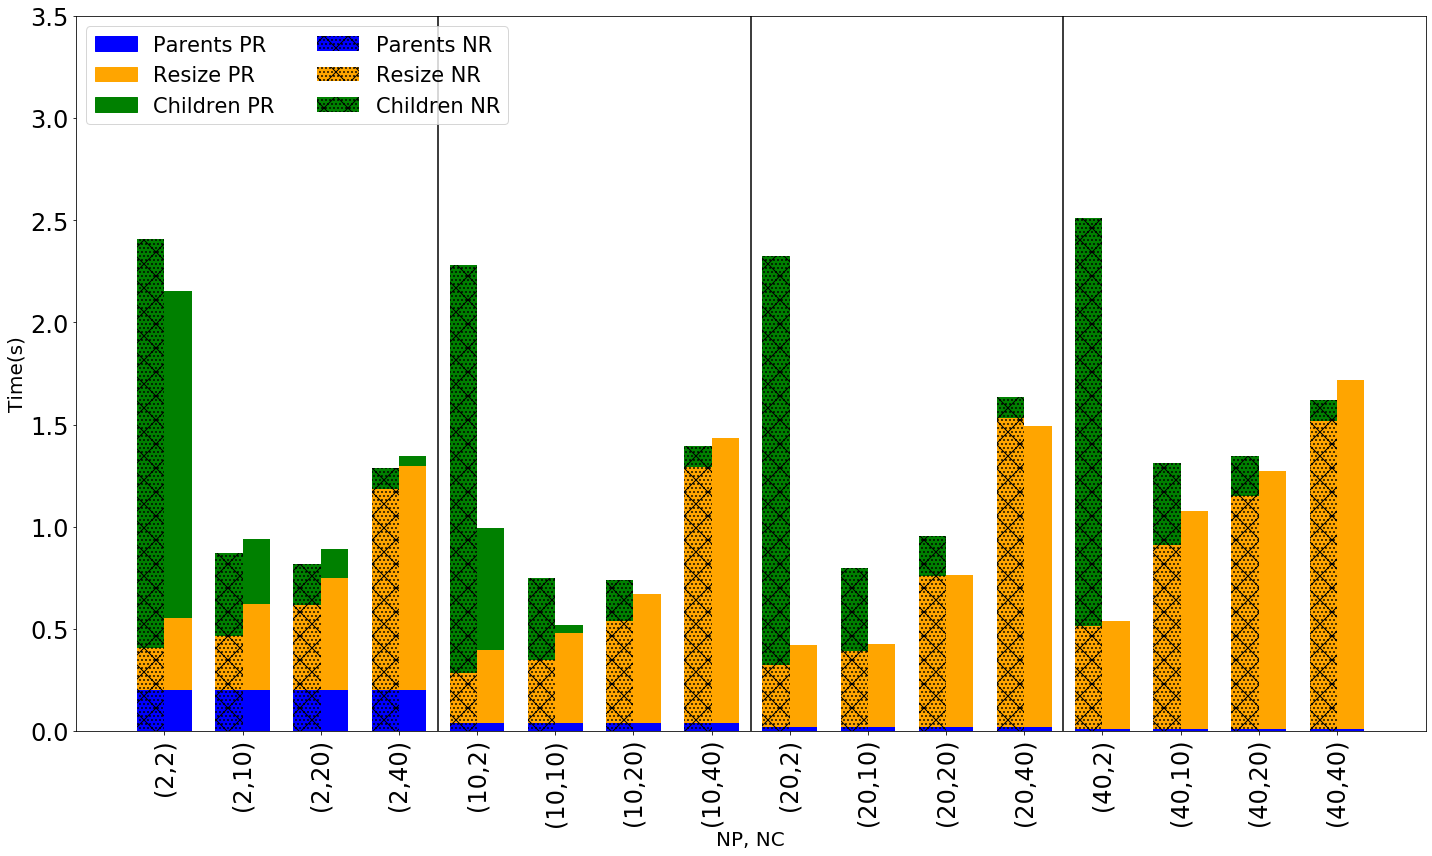

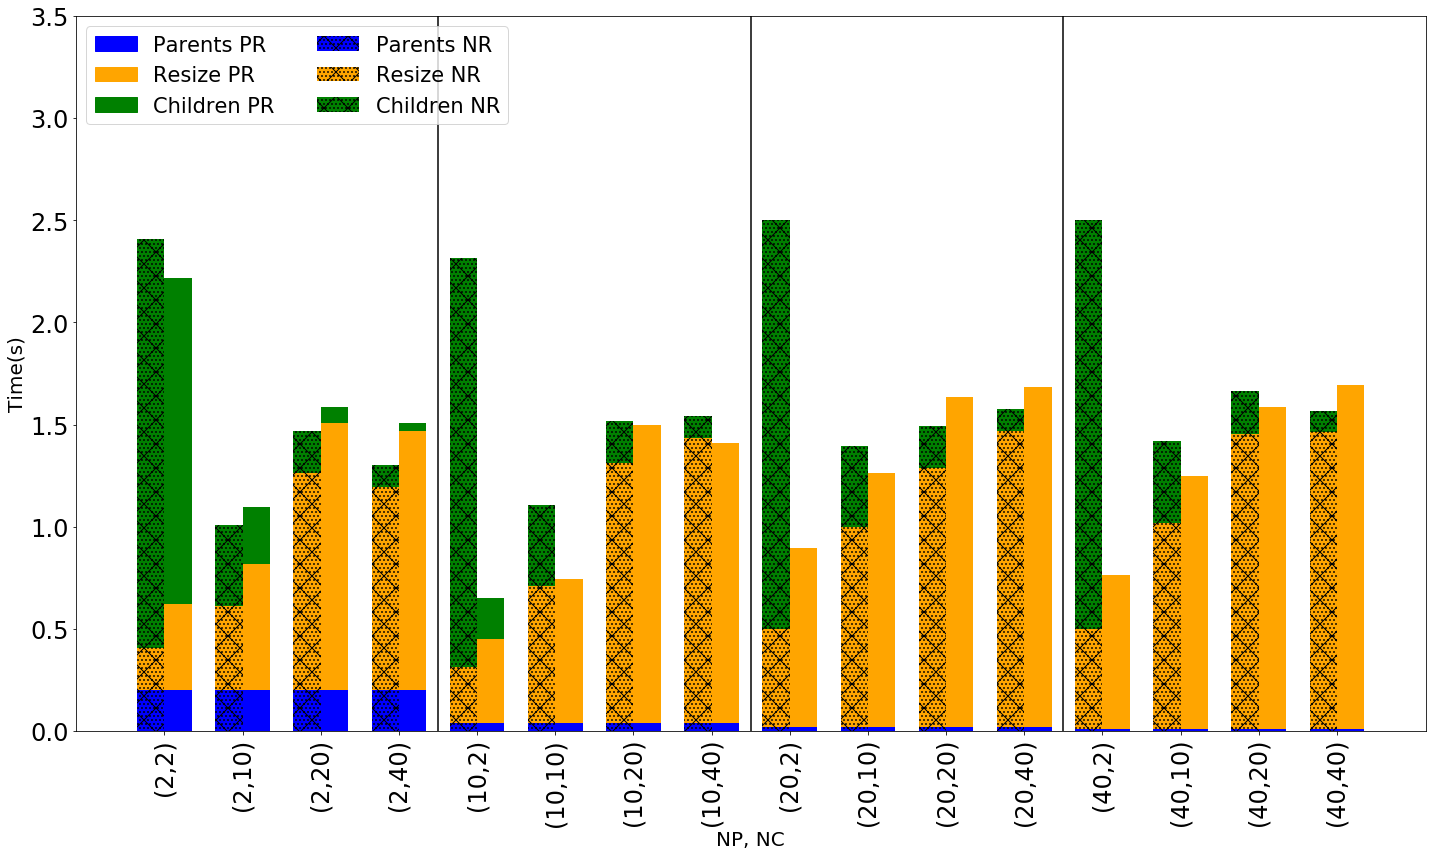

In [27]:
TP_A_data=[[0.1997793257575758, 0.1997793257575758, 0.1997793257575758, 0.1997793257575758, 0.040469166666666695, 0.040469166666666695, 0.040469166666666695, 0.040469166666666695, 0.019951386363636366, 0.019951386363636366, 0.019951386363636366, 0.019951386363636366, 0.010227022727272729, 0.010227022727272729, 0.010227022727272729, 0.010227022727272729], [0.20020575000000002, 0.20020575000000002, 0.20020575000000002, 0.20020575000000002, 0.039894712121212116, 0.039894712121212116, 0.039894712121212116, 0.039894712121212116, 0.020662818181818185, 0.020662818181818185, 0.020662818181818185, 0.020662818181818185, 0.010635333333333332, 0.010635333333333332, 0.010635333333333332, 0.010635333333333332]]
TH_A_data=[[1.9977932575757578, 0.40469166666666695, 0.19951386363636364, 0.10227022727272729, 1.9977932575757578, 0.40469166666666695, 0.19951386363636364, 0.10227022727272729, 1.9977932575757578, 0.40469166666666695, 0.19951386363636364, 0.10227022727272729, 1.9977932575757578, 0.40469166666666695, 0.19951386363636364, 0.10227022727272729], [2.0020575000000003, 0.39894712121212117, 0.20662818181818185, 0.10635333333333331, 2.0020575000000003, 0.39894712121212117, 0.20662818181818185, 0.10635333333333331, 2.0020575000000003, 0.39894712121212117, 0.20662818181818185, 0.10635333333333331, 2.0020575000000003, 0.39894712121212117, 0.20662818181818185, 0.10635333333333331]]
TM_A_data=[[0.2083043333333333, 0.2661843333333333, 0.41778833333333326, 0.9868953333333335, 0.242685, 0.3060793333333333, 0.4986676666666667, 1.2530743333333334, 0.305179, 0.373607, 0.7375183333333334, 1.5113886666666667, 0.501651, 0.8987069999999999, 1.138518666666667, 1.5091376666666665], [0.205789, 0.4116923333333334, 1.0607546666666667, 0.9947066666666666, 0.27494700000000005, 0.669121, 1.2705783333333334, 1.3951336666666665, 0.4765406666666667, 0.9758123333333333, 1.267633, 1.4479673333333334, 0.4905743333333333, 1.0088953333333333, 1.4447113333333332, 1.4516683333333333]]


for dist in [1,2]:
    dist_index=dist-1
    f=plt.figure(figsize=(20, 12))
#for numP in values:

    x = np.arange(len(labelsP_J))

    width = 0.35
    sumaTP_TM = np.add(TP_data[dist_index], TM_data[dist_index]).tolist()
    sumaTP_TM_A = np.add(TP_A_data[dist_index], TM_A_data[dist_index]).tolist()

    ax=f.add_subplot(111)

    ax.bar(x+width/2, TP_data[dist_index], width, color='blue')
    ax.bar(x+width/2, TM_data[dist_index], width, bottom=TP_data[dist_index],color='orange')
    ax.bar(x+width/2, TH_data[dist_index], width, bottom=sumaTP_TM, color='green')

    ax.bar(x-width/2, TP_A_data[dist_index], width, hatch="\\/...", color='blue')
    ax.bar(x-width/2, TM_A_data[dist_index], width, bottom=TP_A_data[dist_index], hatch="\\/...", color='orange')
    ax.bar(x-width/2, TH_A_data[dist_index], width, bottom=sumaTP_TM_A, hatch="\\/...", color='green')

    ax.set_ylabel("Time(s)", fontsize=20)
    ax.set_xlabel("NP, NC", fontsize=20)
    plt.xticks(x, labelsP_J, rotation=90)

    blue_Spatch = mpatches.Patch(color='blue', label='Parents PR')
    orange_Spatch = mpatches.Patch(color='orange', label='Resize PR')
    green_Spatch = mpatches.Patch(color='green', label='Children PR')
    blue_Apatch = mpatches.Patch(hatch='\\/...', facecolor='blue', label='Parents NR')
    orange_Apatch = mpatches.Patch(hatch='\\/...', facecolor='orange', label='Resize NR')
    green_Apatch = mpatches.Patch(hatch='\\/...', facecolor='green', label='Children NR')


    handles=[blue_Spatch,orange_Spatch,green_Spatch,blue_Apatch,orange_Apatch,green_Apatch]

    plt.legend(handles=handles, loc='upper left', fontsize=21,ncol=2)
    
    ax.axvline((3.5), color='black')
    ax.axvline((7.5), color='black')
    ax.axvline((11.5), color='black')
    
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis='both', which='minor', labelsize=22)
    plt.ylim((0, 3.5))
    #ax.axvline(4)
    
    f.tight_layout()
    f.savefig("Images/EX_Partitions_"+dist_names[dist]+".png", format="png")

In [17]:
#Reserva de memoria para las estructuras
TC_data=[0]*2
TS_data=[0]*2
TA_data=[0]*2

TC_A_data=[0]*2
TS_A_data=[0]*2
TA_A_data=[0]*2

for dist in [1,2]:
    dist_index=dist-1

    TC_data[dist_index]=[0]*len(values)*(len(values))
    TS_data[dist_index]=[0]*len(values)*(len(values))
    TA_data[dist_index]=[0]*len(values)*(len(values))

    TC_A_data[dist_index]=[0]*len(values)*(len(values))
    TS_A_data[dist_index]=[0]*len(values)*(len(values))
    TA_A_data[dist_index]=[0]*len(values)*(len(values))

if(n_qty == 1):
    groupM_aux = dfM.groupby(['NP', 'NS'])['TC']
else:
    groupM_aux = dfM.groupby(['NP', 'NS', 'Dist'])['TC']

grouped_aggM_aux = groupM_aux.agg(['mean'])
grouped_aggM_aux.columns = grouped_aggM_aux.columns.get_level_values(0)

dist=1
for dist in [1,2]:
    dist_index=dist-1
    dist_v = str(dist)+","+str(dist)
    i=0
    r=0
    for numP in values:
        j=0
        for numC in values:
        
            test_tc_real = grouped_aggM_aux.loc[(numP,numC,dist_v)]['mean']
            
            for tipo in [0, 100]:
            
                test=grouped_aggM.loc[(dist_v,tipo,numP,numC)][['TS', 'TA']]
                test=test.tolist()
                    
                if tipo == 0:
                    TC_data[dist_index][i*len(values) + j] = test_tc_real
                    TS_data[dist_index][i*len(values) + j] = test[0] 
                    TA_data[dist_index][i*len(values) + j] = 0
                else:
                    TC_A_data[dist_index][i*len(values) + j] = test_tc_real
                    TS_A_data[dist_index][i*len(values) + j] = test[0]
                    TA_A_data[dist_index][i*len(values) + j] = test[1]
            j+=1
        i+=1
                    
                    
##########################

print(TC_data)
#print(TA_A_data[1])
#print(TS_data)
#print(TA_data)

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

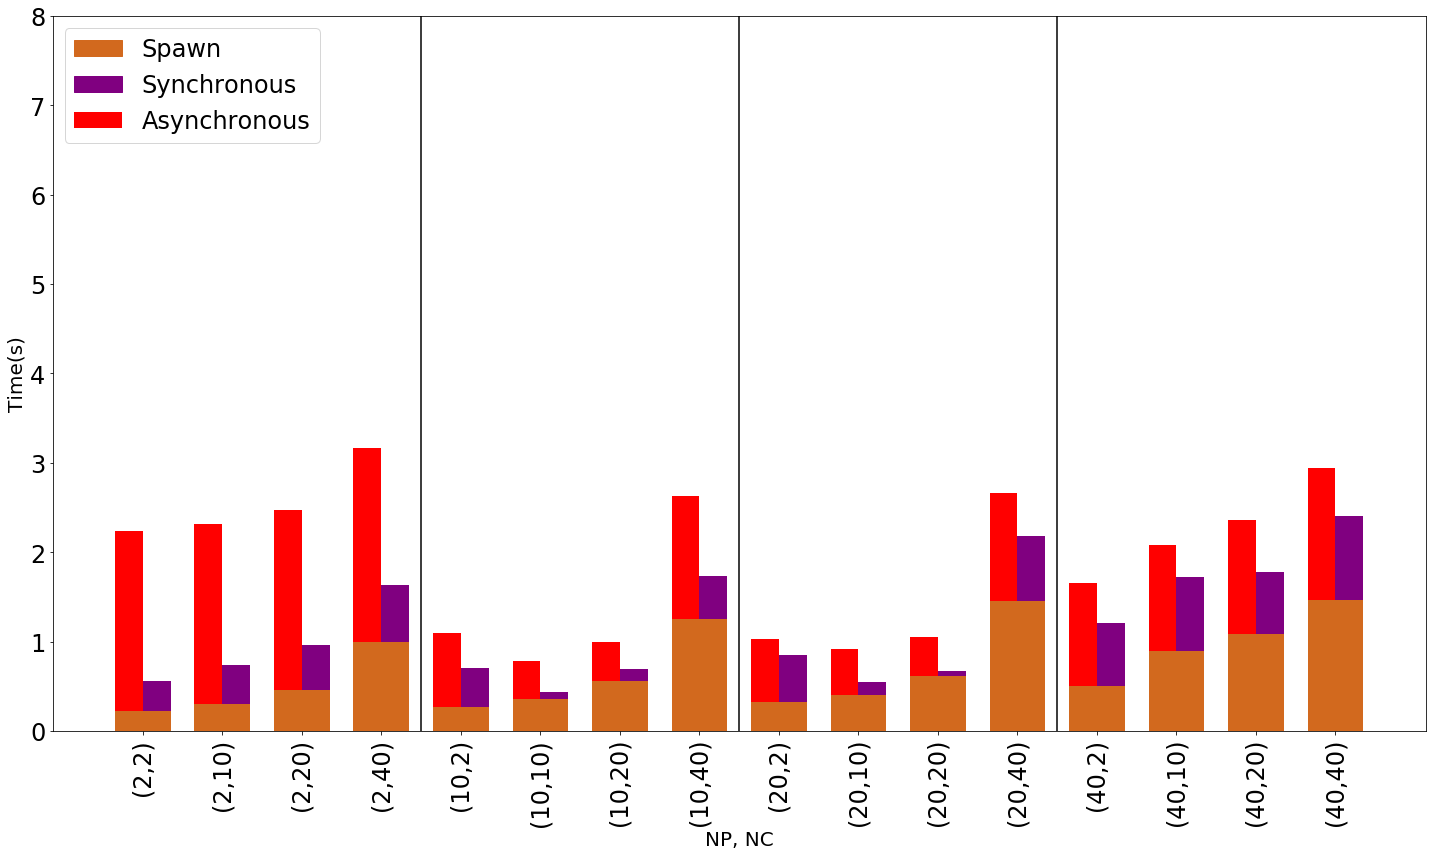

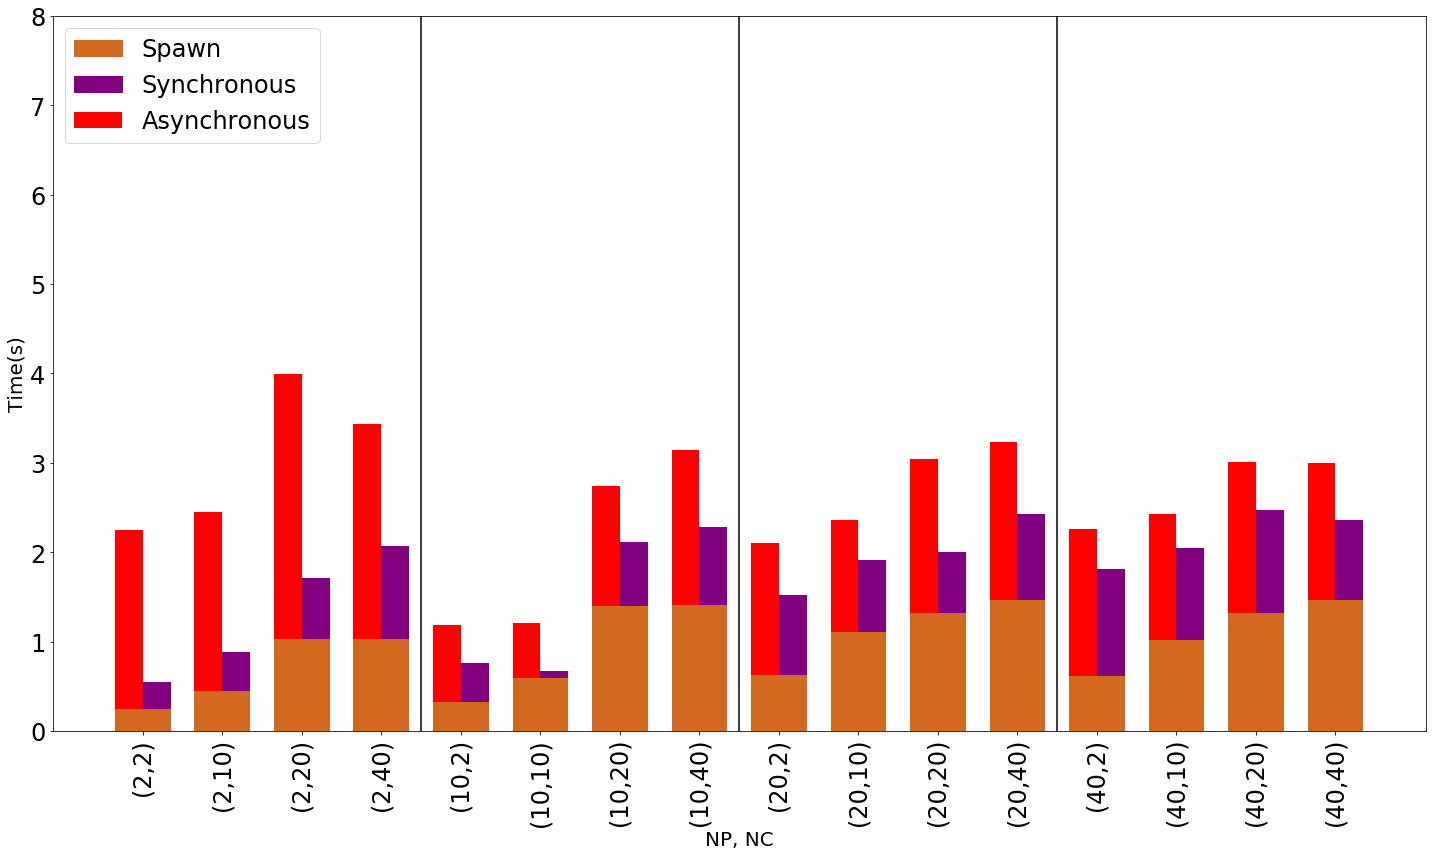

In [271]:
for dist in [1,2]:
    dist_index=dist-1
    f=plt.figure(figsize=(20, 12))

    x = np.arange(len(labelsP_J))
    width = 0.35
    sumaTC_TS_A = np.add(TC_A_data[dist_index], TS_A_data[dist_index]).tolist()

    ax=f.add_subplot(111)

    ax.bar(x+width/2, TC_data[dist_index], width, color='chocolate')
    ax.bar(x+width/2, TS_data[dist_index], width, bottom=TC_data[dist_index], color='purple')

    ax.bar(x-width/2, TC_A_data[dist_index], width, hatch="", color='chocolate')
    ax.bar(x-width/2, TS_A_data[dist_index], width, bottom=TC_A_data[dist_index], hatch="\\/...", color='purple')
    ax.bar(x-width/2, TA_A_data[dist_index], width, bottom=sumaTC_TS_A, hatch="", color='red')

    ax.set_ylabel("Time(s)", fontsize=20)
    ax.set_xlabel("NP, NC", fontsize=20)
    plt.xticks(x, labelsP_J, rotation=90)

    labels = ['Spawn', 'Synchronous', 'Asynchronous'] # Necesario para subdividir
    brown_Spatch = mpatches.Patch(color='chocolate', label='Spawn')
    purple_Spatch = mpatches.Patch(color='purple', label='Synchronous')
    red_Apatch = mpatches.Patch(facecolor='red', label='Asynchronous')

    #handles=[(brown_Spatch, brown_Apatch),purple_Spatch,red_Apatch] Dos colores para misma leyenda
    handles=[brown_Spatch,purple_Spatch,red_Apatch]

    plt.legend(handles=handles, labels=labels, loc='upper left', fontsize=24, ncol=1, handler_map={tuple: HandlerTuple(ndivide=None)})
#bbox_to_anchor=(1, 0.5) --> Para sacar fuera de la grafica la leyenda

    ax.axvline((3.5), color='black')
    ax.axvline((7.5), color='black')
    ax.axvline((11.5), color='black')
    
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis='both', which='minor', labelsize=22)
    #ax.axvline(4)
    plt.ylim((0, 8))
    f.tight_layout()
    f.savefig("Images/Malt_Partitions_"+dist_names[dist]+".png", format="png")

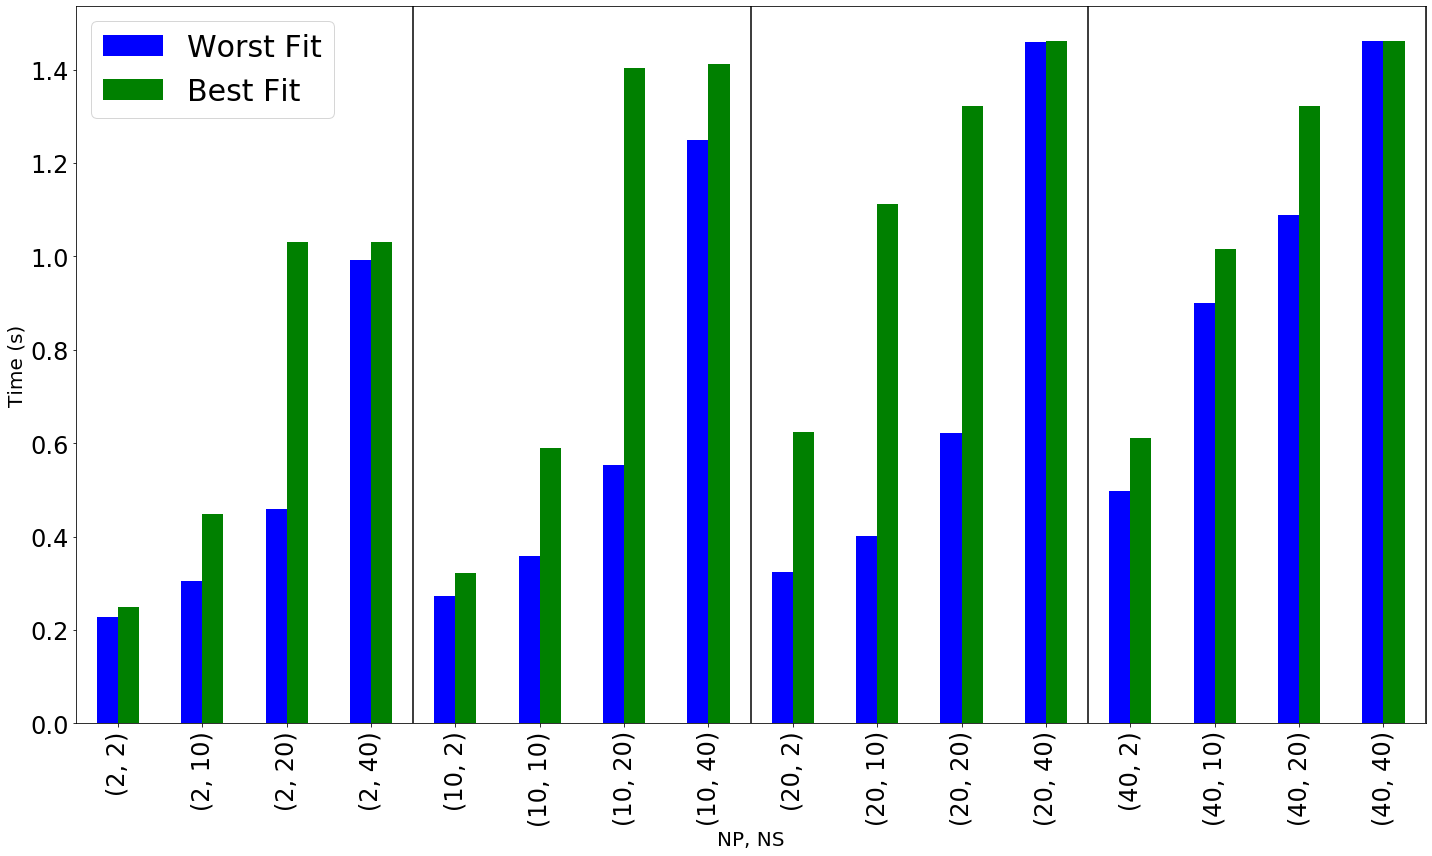

In [272]:
if(n_qty == 1):
    groupM_aux = dfM.groupby(['NP', 'NS'])['TC']
else:
    groupM_aux = dfM.groupby(['NP', 'NS', 'Dist'])['TC']

grouped_aggM_aux = groupM_aux.agg(['mean'])
grouped_aggM_aux.columns = grouped_aggM_aux.columns.get_level_values(0)

j = 0
f=plt.figure(figsize=(20, 12))
    
ax=f.add_subplot(111)
grouped_aggM_aux.unstack().plot(kind='bar', color=['b', 'g'], ax=ax) 
ax.set_ylabel("Time (s)", fontsize=20)
ax.set_xlabel("NP, NS", fontsize=20)
ax.legend(["Worst Fit", "Best Fit"], fontsize=30);

ax.axvline((3.5), color='black')
ax.axvline((7.5), color='black')
ax.axvline((11.5), color='black')
ax.axvline((15.5), color='black')
    
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)
    
f.tight_layout()
f.savefig("Images/TCR_Tiempo_Barras.png", format="png")
j = (j+1)%5

Para Tipo = 1


KeyError: 100.0

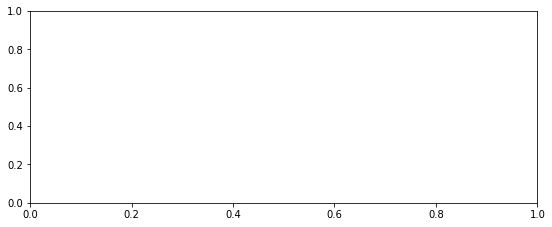

In [25]:
for i in range(1,3):
    print("Para Tipo = " + str(i))
    
    j = 0
    f=plt.figure(figsize=(20, 12))
    numC =2 
    for numP in values:

        ax=f.add_subplot(positions[j])
        
        t_par = grouped_aggL['Ti'].loc[(0,i,100,numP,slice(None))].mean() 
        grouped_aggL['Ti'].loc[(1,i,100,numP,slice(None))].plot(kind='bar',color='green', ax=ax) 
        
        ax.axhline(y=t_par, xmin=0, xmax=1, color='purple')
        ax.set_ylabel("Time (s)", fontsize=20)
        ax.set_xlabel("NP,NC", fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=18)
        ax.tick_params(axis='both', which='minor', labelsize=22)
        
        locs, labels_aux = plt.xticks()
        plt.xticks(locs, labels=labelsP[j], rotation=90)
        
        
        blue_patch = mpatches.Patch(color='green', label='Malleable iteration')
        handles=[blue_patch]
        plt.legend(handles=handles, loc='upper left', fontsize=12)
        
        f.tight_layout()
        f.savefig("Images/Iter_type="+dist_names[i]+"_Perc_type="+str(100)+".png", format="png")
        j = (j+1)%5

In [274]:
dfG.columns

Index(['N', '%Async', 'Groups', 'Dist', 'Matrix', 'CommTam', 'Time', 'Iters',
       'TE', 'S'],
      dtype='object')

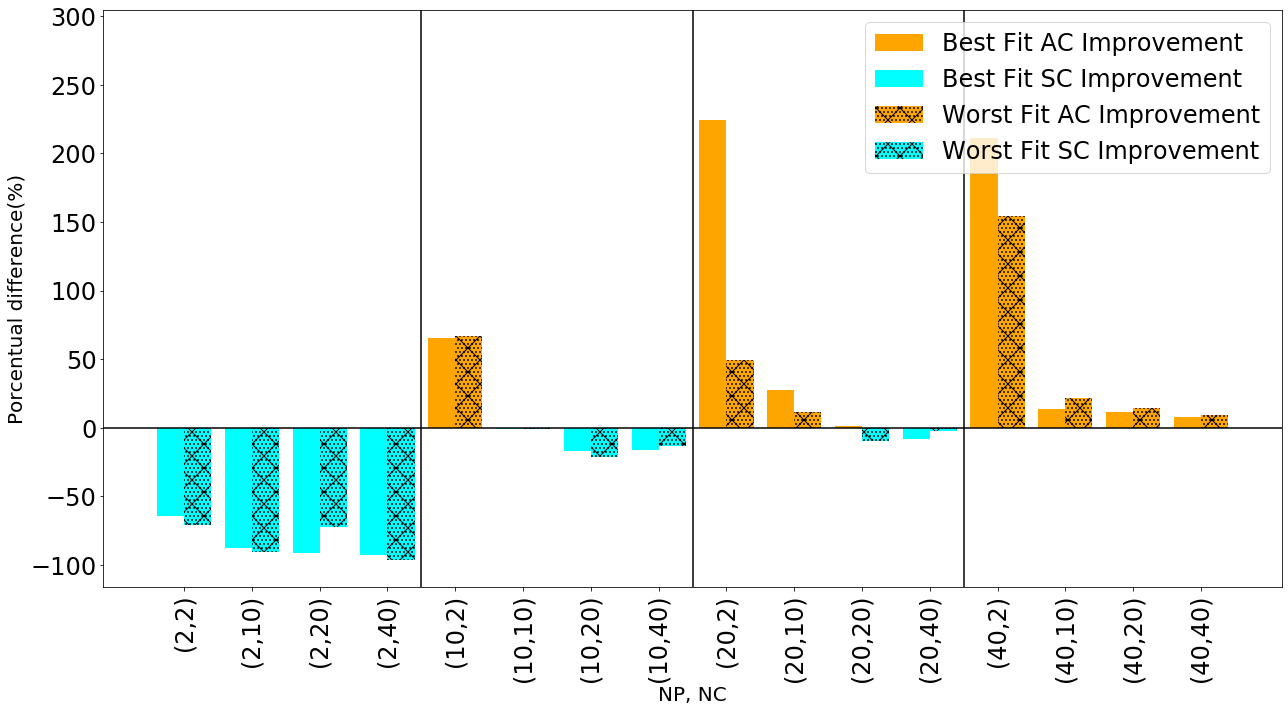

In [184]:
f=plt.figure(figsize=(18, 10))
#for numP in values:

x = np.arange(len(labelsP_J))

width = 0.4
middle = 0
ax=f.add_subplot(111)

for dist in [1,2]:
    dist_index=dist-1
    sumaTP_TM = np.add(TP_data[dist_index], TM_data[dist_index])
    bar_res = np.add(sumaTP_TM, TH_data[dist_index])

    sumaTP_TM_A = np.add(TP_A_data[dist_index], TM_A_data[dist_index])
    sumaTP_TM_A = np.add(sumaTP_TM_A, TH_A_data[dist_index])
    
    bar_res = np.divide(bar_res, sumaTP_TM_A)
    bar_res = (bar_res-1)*100

    supper = np.ma.masked_where(bar_res < middle, bar_res)
    slower = np.ma.masked_where(bar_res > middle, bar_res)

    plt.ylim(min(bar_res)-20, max(bar_res)+150) #FIXME Error cuando el max o min de dist=1 es mayor que el de dist=2

    offset = -width/2 # Best Fit
    patch = ""
    if dist == 2:
        offset = (width/2) # Worst Fit
        patch = "\\/..."
        
    ax.bar(x+offset, supper, width, color="orange", hatch=patch)
    ax.bar(x+offset, slower, width, color="cyan", hatch=patch)


ax.set_ylabel("Porcentual difference(%)", fontsize=20)
ax.set_xlabel("NP, NC", fontsize=20)
plt.xticks(x, labelsP_J, rotation=90)


orange_Bf_patch = mpatches.Patch(facecolor='orange', label='Best Fit AC Improvement')
blue_Bf_patch = mpatches.Patch(facecolor='cyan', label='Best Fit SC Improvement')
orange_Wf_patch = mpatches.Patch(hatch='\\/...', facecolor='orange', label='Worst Fit AC Improvement')
blue_Wf_patch = mpatches.Patch(hatch='\\/...', facecolor='cyan', label='Worst Fit SC Improvement')
handles=[orange_Bf_patch, blue_Bf_patch, orange_Wf_patch, blue_Wf_patch]
plt.legend(handles=handles, loc='upper right', fontsize=24)

ax.axhline((middle), color='black')
ax.axvline((3.5), color='black')
ax.axvline((7.5), color='black')
ax.axvline((11.5), color='black')
    
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)
    #ax.axvline(4)
    
f.tight_layout()
f.savefig("Images/EX_Difference.png", format="png")
j = (j+1)%5

In [ ]:
x = [0, 1, 2, 10,  20,  40]
y = [0, 4, 2, 0.4, 0.2, 0.1]
z = [0,]
for i in range(len(x)-1):
    z.append(y[1]/y[i+1])
f=plt.figure(figsize=(10, 8))
ax=f.add_subplot(111)
ax.plot(x,z)
ax.set_ylabel("SpeedUp", fontsize=22)
ax.set_xlabel("Processes", fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=18)
f.tight_layout()
f.savefig("Test.png", format="png")

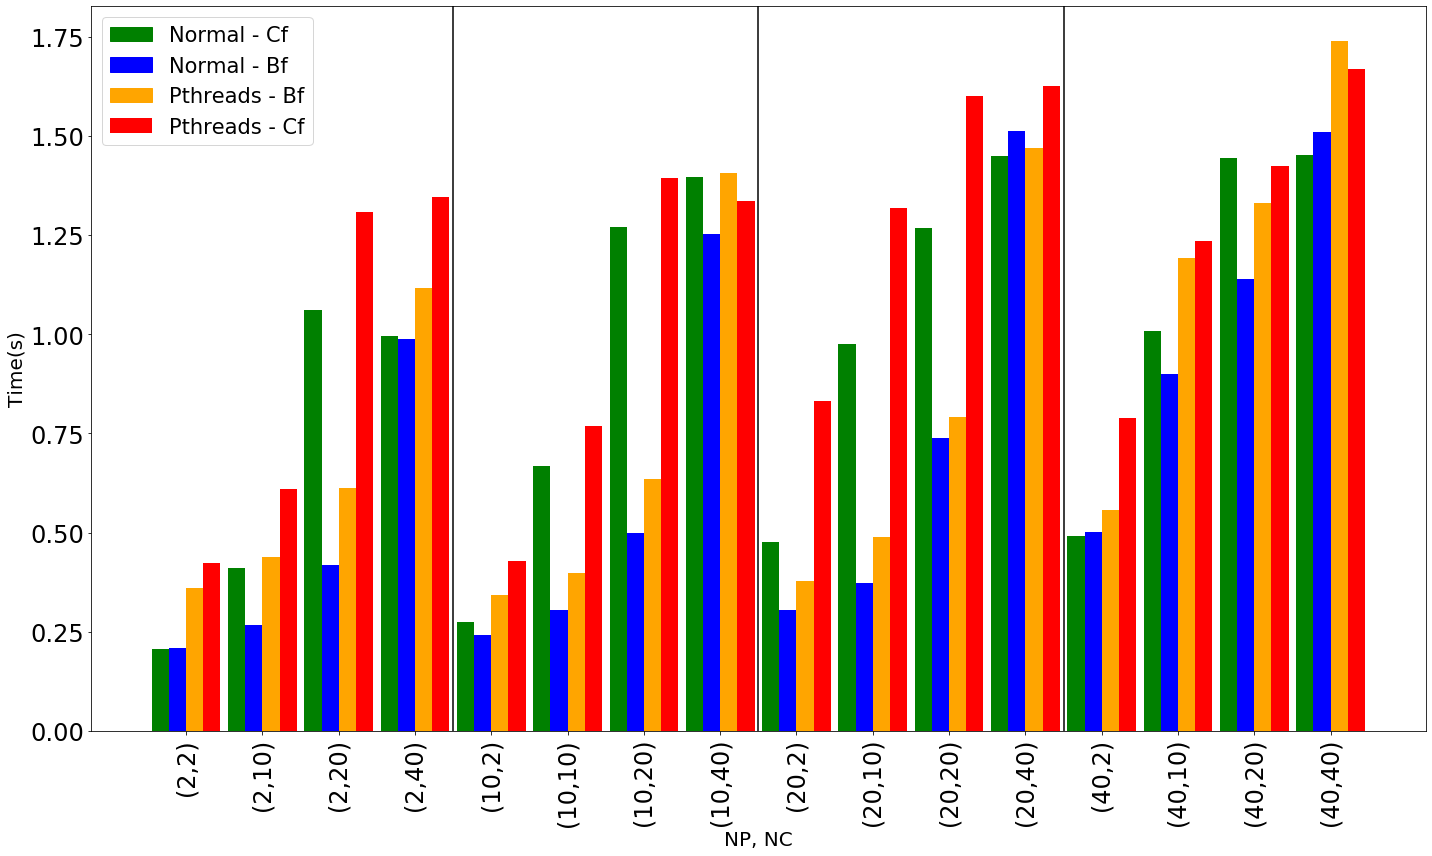

In [35]:
f=plt.figure(figsize=(20, 12))
#for numP in values:

#mpict=[73.51697466666666, 65.51325966666666, 52.19395466666668, 34.024326, 
#       60.883046666666665, 6.740908999999999, 4.857252666666667, 8.431013333333334, 
#       8.392006666666667, 9.646620333333333, 8.497321000000001, 12.982642333333333, 
#       8.007896666666667, 9.762626333333332, 6.662559000000001, 5.316057333333333]
#mpivar=[75.53585966666667, 69.56025666666666, 18.082787666666665, 154.39648000000003,
#        11.998184, 1.27766, 2.194493, 2.2691966666666668,
#        1.8346349999999998, 1.7718876666666665, 1.6892053333333334, 1.5759526666666668,
#        1.9237193333333333, 1.1625573333333332, 1.2879283333333333, 0.850577]
#threadct=[2.0040453333333335, 2.00311, 2.6234766666666665, 2.699171666666667,
#          2.0707343333333337, 2.2307106666666665, 4.222584666666666, 4.246569666666667,
#          4.020083, 4.503111666666666, 5.467942333333333, 5.048009,
#          3.8683916666666662, 4.705335000000001, 5.640752666666667, 5.811503999999999]
#threadvar=[1.9998449999999999, 2.000283666666667, 2.957152666666667, 2.401677,
#           0.8674843333333334, 0.6187566666666666, 1.3398349999999999, 1.735828,
#           1.4827233333333334, 1.245435, 1.7185836666666665, 1.7706360000000003,
#           1.645278, 1.414596666666667, 1.6812523333333333, 1.5372543333333333]

threadbf = [0.3616343333333334, 0.4390483333333333, 0.6118543333333334, 1.116497, 
            0.34279300000000007, 0.39713933333333334, 0.6350386666666668, 1.4056896666666667, 
            0.37821333333333335, 0.488335, 0.7908086666666666, 1.4691523333333334, 
            0.5579729999999999, 1.1923566666666667, 1.3307016666666667, 1.7391976666666666]

threadcf = [0.42423133333333335, 0.6090126666666666, 1.3089426666666668, 1.3461553333333331,
            0.427392, 0.7682310000000001, 1.3941153333333334, 1.3357656666666664, 
            0.8323596666666666, 1.318649, 1.5996213333333333, 1.6247436666666666, 
            0.7896679999999999, 1.2355183333333333, 1.4249120000000002, 1.6693683333333331]

normalbf = [0.2083043333333333, 0.2661843333333333, 0.41778833333333326, 0.9868953333333335,
            0.242685, 0.3060793333333333, 0.4986676666666667, 1.2530743333333334, 
            0.305179, 0.373607, 0.7375183333333334, 1.5113886666666667, 
            0.501651, 0.8987069999999999, 1.138518666666667, 1.5091376666666665]

normalcf = [0.205789, 0.4116923333333334, 1.0607546666666667, 0.9947066666666666, 
            0.27494700000000005, 0.669121, 1.2705783333333334, 1.3951336666666665, 
            0.4765406666666667, 0.9758123333333333, 1.267633, 1.4479673333333334, 
            0.4905743333333333, 1.0088953333333333, 1.4447113333333332, 1.4516683333333333]

x = np.arange(len(labelsP_J))

width = 0.45/2

ax=f.add_subplot(111)

ax.bar(x-width/2, normalbf, width, hatch="", color='blue')

ax.bar(x-width*1.5, normalcf, width, hatch="",color='green')

ax.bar(x+width/2, threadbf, width, hatch="", color='orange')

ax.bar(x+width*1.5, threadcf, width, hatch="", color='red')

ax.set_ylabel("Time(s)", fontsize=20)
ax.set_xlabel("NP, NC", fontsize=20)
plt.xticks(x, labelsP_J, rotation=90)

normalbf_patch = mpatches.Patch(color='blue', label='Normal - Bf')
normalcf_patch = mpatches.Patch(color='green', label='Normal - Cf')
threadbf_patch = mpatches.Patch(color='orange', label='Pthreads - Bf')
threadcf_patch = mpatches.Patch(hatch='', facecolor='red', label='Pthreads - Cf')


handles=[normalcf_patch,normalbf_patch,threadbf_patch,threadcf_patch]

plt.legend(handles=handles, loc='upper left', fontsize=21)
    
ax.axvline((3.5), color='black')
ax.axvline((7.5), color='black')
ax.axvline((11.5), color='black')
    
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)
    #ax.axvline(4)
#plt.ylim((0, 15))
    
f.tight_layout()
f.savefig("Images/Mall_AR.png", format="png")
j = (j+1)%5